In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
%%javascript
$('.nbp-app-bar').toggle()

<IPython.core.display.Javascript object>

## Check out the 5 datasets

In [3]:
path = '../kaggle_data/input/'

In [4]:
train = pd.read_csv(path+'train.csv')
weather = pd.read_csv(path+'weather.csv')
spray = pd.read_csv(path+'spray.csv')
test = pd.read_csv(path+'test.csv')
sample_sub = pd.read_csv(path+'sampleSubmission.csv')

In [5]:
sample_sub.head()

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [6]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [7]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [8]:
print(test.shape)
print(test.Date.nunique())
print(test.Date.min())
print(test.Date.max())
test.head(2)

(116293, 11)
95
2008-06-11
2014-10-02


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [9]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


## Trap Readings in `train.csv`

In [10]:
# How large is our training dataset?
print(train.shape) # It has over 10,000 observations
train.columns # and 12 columns.

(10506, 12)


Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [11]:
# We want to create a unique identifer for traps
print(train['Trap'].head(3)) # Each trap has an identifier that starts with T
print(train['Trap'].nunique()) # There are 136 unique traps. that's about 100 rows per trap!

0    T002
1    T002
2    T007
Name: Trap, dtype: object
136


In [12]:
# Each trap has readings on multiple days. For example, the first one has 185 rows, with 67 unique dates:
print(train[train['Trap']=='T002'].Date.nunique())
print(train[train['Trap']=='T002'].Date.count())
train[train['Trap']=='T002'].Date.head()

67
185


0     2007-05-29
1     2007-05-29
25    2007-06-05
26    2007-06-05
27    2007-06-05
Name: Date, dtype: object

In [13]:
# In addition to Date, what makes a row unique?
# Species and count over 50.
print(train[train['Trap']=='T002'].Date.value_counts().head())
train[(train['Trap']=='T002') & (train['Date']=='2013-07-12')].head(3)

2013-07-12    12
2013-06-14     8
2009-07-24     7
2013-07-08     6
2007-08-01     6
Name: Date, dtype: int64


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
8669,2013-07-12,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,50,0
8670,2013-07-12,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,50,0
8671,2013-07-12,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,50,0


In [14]:
# How many times does each species show up?
print(train['Species'].value_counts()) # Species are not equally represented
train.groupby('Species').mean() # WNV is only ever present in 3 of the 7 species.

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64


,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Species,,,,,,
CULEX ERRATICUS,10.000000,41.974689,-87.890615,9.000000,7.000000,0.000000
CULEX PIPIENS,32.799926,41.813402,-87.680481,7.424972,16.550945,0.088922
CULEX PIPIENS/RESTUANS,36.706439,41.848832,-87.705241,7.939604,13.945286,0.055135
CULEX RESTUANS,36.784307,41.859096,-87.713366,8.019708,8.551460,0.017883
CULEX SALINARIUS,32.627907,41.825134,-87.693788,7.767442,1.686047,0.000000
CULEX TARSALIS,30.500000,41.818023,-87.661568,7.500000,1.166667,0.000000
CULEX TERRITANS,36.900901,41.798297,-87.658375,7.599099,2.297297,0.000000


## Reduce the dataset using a `groupby` statement

In [15]:
# We can reduce the dataset to a single row for each trap reading by species and date.
print(train['Date'].nunique()) # There are 95 unique dates
print((train['Trap']).nunique()) # There are 136 unique traps
len(train.groupby(['Date', 'Trap', 'Species'])) # There are 8,500 unique readings by date & trap

95
136


8475

In [16]:
# Individual daily trap readings are combination of date, trap, and species:
train.groupby(['Date', 'Trap', 'Species']).sum().sort_values(['WnvPresent'], ascending=False).head()

Block     Latitude    Longitude  \
Date       Trap Species                                                   
2007-08-16 T115 CULEX PIPIENS             612  2125.343808 -4467.592962   
2013-08-01 T900 CULEX PIPIENS/RESTUANS    250  1049.367225 -2197.265375   
2013-08-29 T900 CULEX PIPIENS             100   419.746890  -878.906150   
2007-08-22 T115 CULEX PIPIENS             384  1333.549056 -2803.195584   
           T138 CULEX PIPIENS             220   917.982230 -1926.879086   

                                        AddressAccuracy  NumMosquitos  \
Date       Trap Species                                                 
2007-08-16 T115 CULEX PIPIENS                       255          2532   
2013-08-01 T900 CULEX PIPIENS/RESTUANS              225           984   
2013-08-29 T900 CULEX PIPIENS                        90           281   
2007-08-22 T115 CULEX PIPIENS                       160          1554   
           T138 CULEX PIPIENS                       110          1054   

                                        WnvPresent  
Date       Trap Species                             
2007-08-16 T115 CULEX PIPIENS                   10  
2013-08-01 T900 CULEX PIPIENS/RESTUANS           9  
2013-08-29 T900 CULEX PIPIENS                    8  
2007-08-22 T115 CULEX PIPIENS                    7  
           T138 CULEX PIPIENS                    6

In [17]:
# Set our new dataset equal to this grouping.
readings=train.groupby(['Date', 'Trap', 'Species']).sum().reset_index()
readings.head()

,Date,Trap,Species,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,T002,CULEX PIPIENS/RESTUANS,41,41.954690,-87.800991,9,1,0
1,2007-05-29,T002,CULEX RESTUANS,41,41.954690,-87.800991,9,1,0
2,2007-05-29,T007,CULEX RESTUANS,62,41.994991,-87.769279,9,1,0
3,2007-05-29,T015,CULEX PIPIENS/RESTUANS,79,41.974089,-87.824812,8,1,0
4,2007-05-29,T015,CULEX RESTUANS,79,41.974089,-87.824812,8,4,0


## Organize the `date` variable

In [18]:
# Let's convert date/time into something usable. 
readings['Day']=readings['Date'].str.split('-').str[-1].astype(str)
readings['Month']=readings['Date'].str.split('-').str[1].astype(str)
readings['Year']=readings['Date'].str.split('-').str[0].astype(int)
readings['MonthDay']=readings['Month'].astype(str) + readings['Day'].astype(str)
readings[['Date', 'Year', 'Month','Day', 'MonthDay']].head()

,Date,Year,Month,Day,MonthDay
0,2007-05-29,2007,05,29,0529
1,2007-05-29,2007,05,29,0529
2,2007-05-29,2007,05,29,0529
3,2007-05-29,2007,05,29,0529
4,2007-05-29,2007,05,29,0529


In [19]:
# Let's create a running count of days within the year:
readings['DayRunner']=pd.to_datetime(readings['Date']).dt.dayofyear
print(readings['DayRunner'].describe())
readings[['DayRunner', 'MonthDay', 'Month', 'Day']].head()

count    8475.000000
mean      218.338643
std        33.048819
min       148.000000
25%       193.000000
50%       219.000000
75%       245.000000
max       282.000000
Name: DayRunner, dtype: float64


,DayRunner,MonthDay,Month,Day
0,149,0529,05,29
1,149,0529,05,29
2,149,0529,05,29
3,149,0529,05,29
4,149,0529,05,29


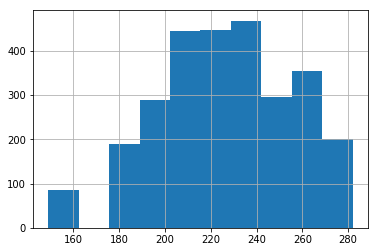

In [20]:
# Let's visualize that dayrunner variable for just one year (2007)
readings[readings['Year']==2007]['DayRunner'].hist();

In [21]:
# How many months are there? Six, ranging from May to October.
readings['Month']=readings['Month'].astype(int)
readings['Month'].value_counts().sort_index()

5       81
6     1337
7     2096
8     2750
9     1947
10     264
Name: Month, dtype: int64

In [22]:
# How many years are we talking about? Just 4 of them.
readings['Year'].value_counts()

2007    2775
2013    2012
2009    1915
2011    1773
Name: Year, dtype: int64

## Outcome Variable

In [23]:
readings.columns

Index(['Date', 'Trap', 'Species', 'Block', 'Latitude', 'Longitude',
       'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'Day', 'Month', 'Year',
       'MonthDay', 'DayRunner'],
      dtype='object')

In [24]:
# Let's make sure the outcome variables is 0/1.
readings['Virus']=0
readings.loc[readings['WnvPresent']>0, 'Virus']=1
readings['Virus'].value_counts()

0    8018
1     457
Name: Virus, dtype: int64

In [25]:
# Is it about the same across the four years?
x=readings['Virus'].groupby(readings['Year']).value_counts()
print(x)

Year  Virus
2007  0        2586
      1         189
2009  0        1896
      1          19
2011  0        1723
      1          50
2013  0        1813
      1         199
Name: Virus, dtype: int64


## Block Location

In [26]:
# Are there multiple traps on the same block?
print('Number of Traps:', readings[readings['Year']==2013]['Trap'].nunique())
print('Number of Blocks:',readings[readings['Year']==2013]['Block'].nunique())
print('Max Traps per Block:', readings[readings['Year']==2013]['Trap'].groupby(readings['Block']).nunique().max())
print('Min Traps per Block:', readings[readings['Year']==2013]['Trap'].groupby(readings['Block']).nunique().min())

Number of Traps: 74
Number of Blocks: 87
Max Traps per Block: 7
Min Traps per Block: 1


In [27]:
# Do some blocks have more virus than others?
print(readings['Virus'].mean())
print(readings['Block'].mean())
readings['Virus'].groupby(readings['Block']).mean().sort_values(ascending=False).head(20)

0.05392330383480826
44.24023598820059


Block
612    1.000000
99     1.000000
588    1.000000
200    1.000000
220    1.000000
185    1.000000
170    1.000000
324    1.000000
328    1.000000
250    1.000000
396    1.000000
408    1.000000
142    1.000000
540    1.000000
240    0.666667
78     0.600000
216    0.500000
123    0.500000
205    0.500000
201    0.500000
Name: Virus, dtype: float64

In [28]:
# 13 Blocks have 3 or more traps
readings[readings['Year']==2013]['Trap'].groupby(readings['Block']).nunique().sort_values(ascending=False).head(15)

Block
10     7
70     6
22     6
11     4
17     4
20     4
50     4
44     3
116    3
58     3
51     3
48     3
40     3
34     2
24     2
Name: Trap, dtype: int64

## Bar Charts by Year and Month

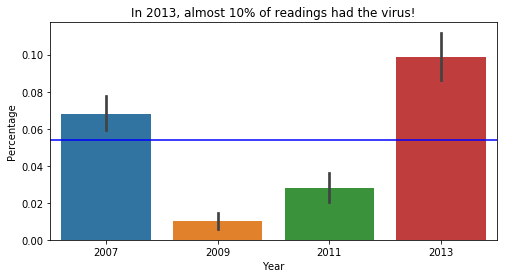

In [29]:
# Let's take a look at virus by year.
ax = plt.figure(figsize=(8,4))
ax=sns.barplot(x='Year', y='Virus', data=readings)
ax.set(ylabel='Percentage', xlabel='Year', title='In 2013, almost 10% of readings had the virus!');
plt.axhline(y=readings['Virus'].mean(), color='blue');

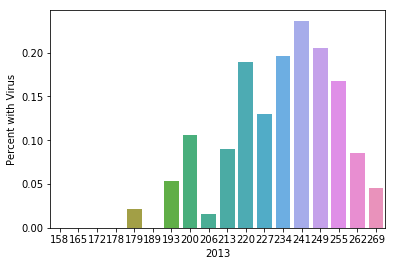

In [30]:
# Is the virus the same throughout the year (Just 2013)?
ax=sns.barplot(x='DayRunner', y='Virus', data=readings[readings['Year']==2013], ci=None);
ax.set(ylabel='Percent with Virus', xlabel='2013')
plt.show()

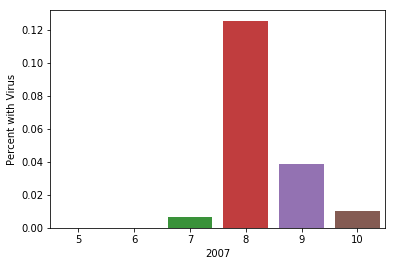

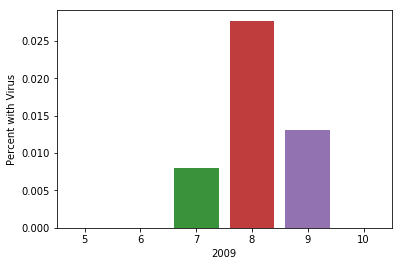

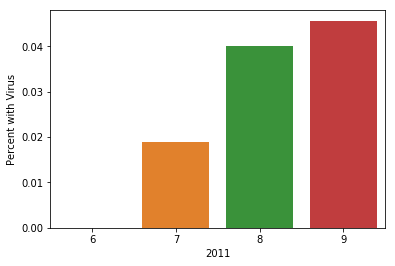

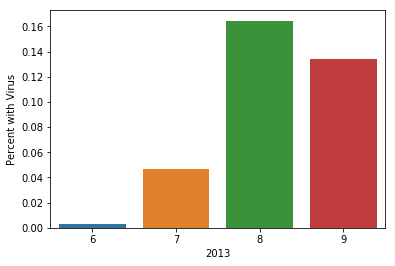

In [31]:
# Is the virus the same throughout the year? Nope. It peaks in August.
ax=sns.barplot(x='Month', y='Virus', data=readings[readings['Year']==2007], ci=None);
ax.set(ylabel='Percent with Virus', xlabel='2007')
plt.show()
ax=sns.barplot(x='Month', y='Virus', data=readings[readings['Year']==2009], ci=None);
ax.set(ylabel='Percent with Virus', xlabel='2009')
plt.show()
ax=sns.barplot(x='Month', y='Virus', data=readings[readings['Year']==2011], ci=None);
ax.set(ylabel='Percent with Virus', xlabel='2011')
plt.show()
ax=sns.barplot(x='Month', y='Virus', data=readings[readings['Year']==2013], ci=None);
ax.set(ylabel='Percent with Virus', xlabel='2013')
plt.show()

[Text(0,0.5,'Percent of Traps with Virus'),
 Text(0.5,0,'Day of the Year (June 1=0)')]

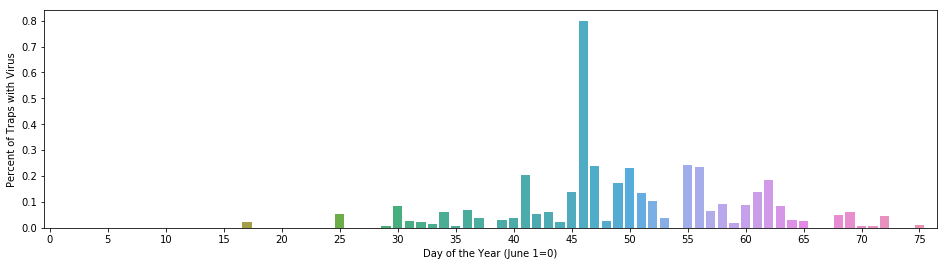

In [32]:
# Plot percent of WNV by day of the year.
ax = plt.figure(figsize=(16,4))
ax=sns.barplot(x='DayRunner', y='Virus', data=readings, ci=None)
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(ylabel='Percent of Traps with Virus', xlabel='Day of the Year (June 1=0)')


## Effects of spraying

In [33]:
readings['spray']=0
readings.loc[(readings['DayRunner']>241) & (readings['DayRunner']<265) & (readings['Year']==2011), 'spray']=1
readings.loc[(readings['DayRunner']>198) & (readings['DayRunner']<263) & (readings['Year']==2013), 'spray']=1
readings['spray'].value_counts()

0    6827
1    1648
Name: spray, dtype: int64

## Export to csv

In [34]:
readings.columns

Index(['Date', 'Trap', 'Species', 'Block', 'Latitude', 'Longitude',
       'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'Day', 'Month', 'Year',
       'MonthDay', 'DayRunner', 'Virus', 'spray'],
      dtype='object')

In [35]:
readings=readings.drop(['Date', 'Trap', 'Species', 'Block', 'Latitude', 'Longitude',
       'NumMosquitos', 'Month', 'Year', 'DayRunner', 'Virus', 'spray'], axis=1)

In [36]:
# Save the cleaned, engineered data
dirname = '../Austin/'
readings.to_csv(dirname + 'readings.csv', index=False)